This project is analyzing cumstomer personality based off of a description of many people. 

By Ben Ilacqua

In [154]:
import pandas as pd 
import numpy as np 
import seaborn as sea 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [155]:
df = pd.read_csv("C:\\Users\\benil\\OneDrive\\Documents\\marketing_campaign.csv", sep = '\t')

In [156]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [157]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [158]:
df.shape

(2240, 29)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [160]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Right off the bat I noticed that there are 24 null values in the Income column, since it is only 24/2240 data points that are missing, I will simply drop the data points.

In [161]:
df.dropna(subset=['Income'] , inplace=True)
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Alright the data is partially cleaned up, Now its time to visualize to see what else needs to be done.

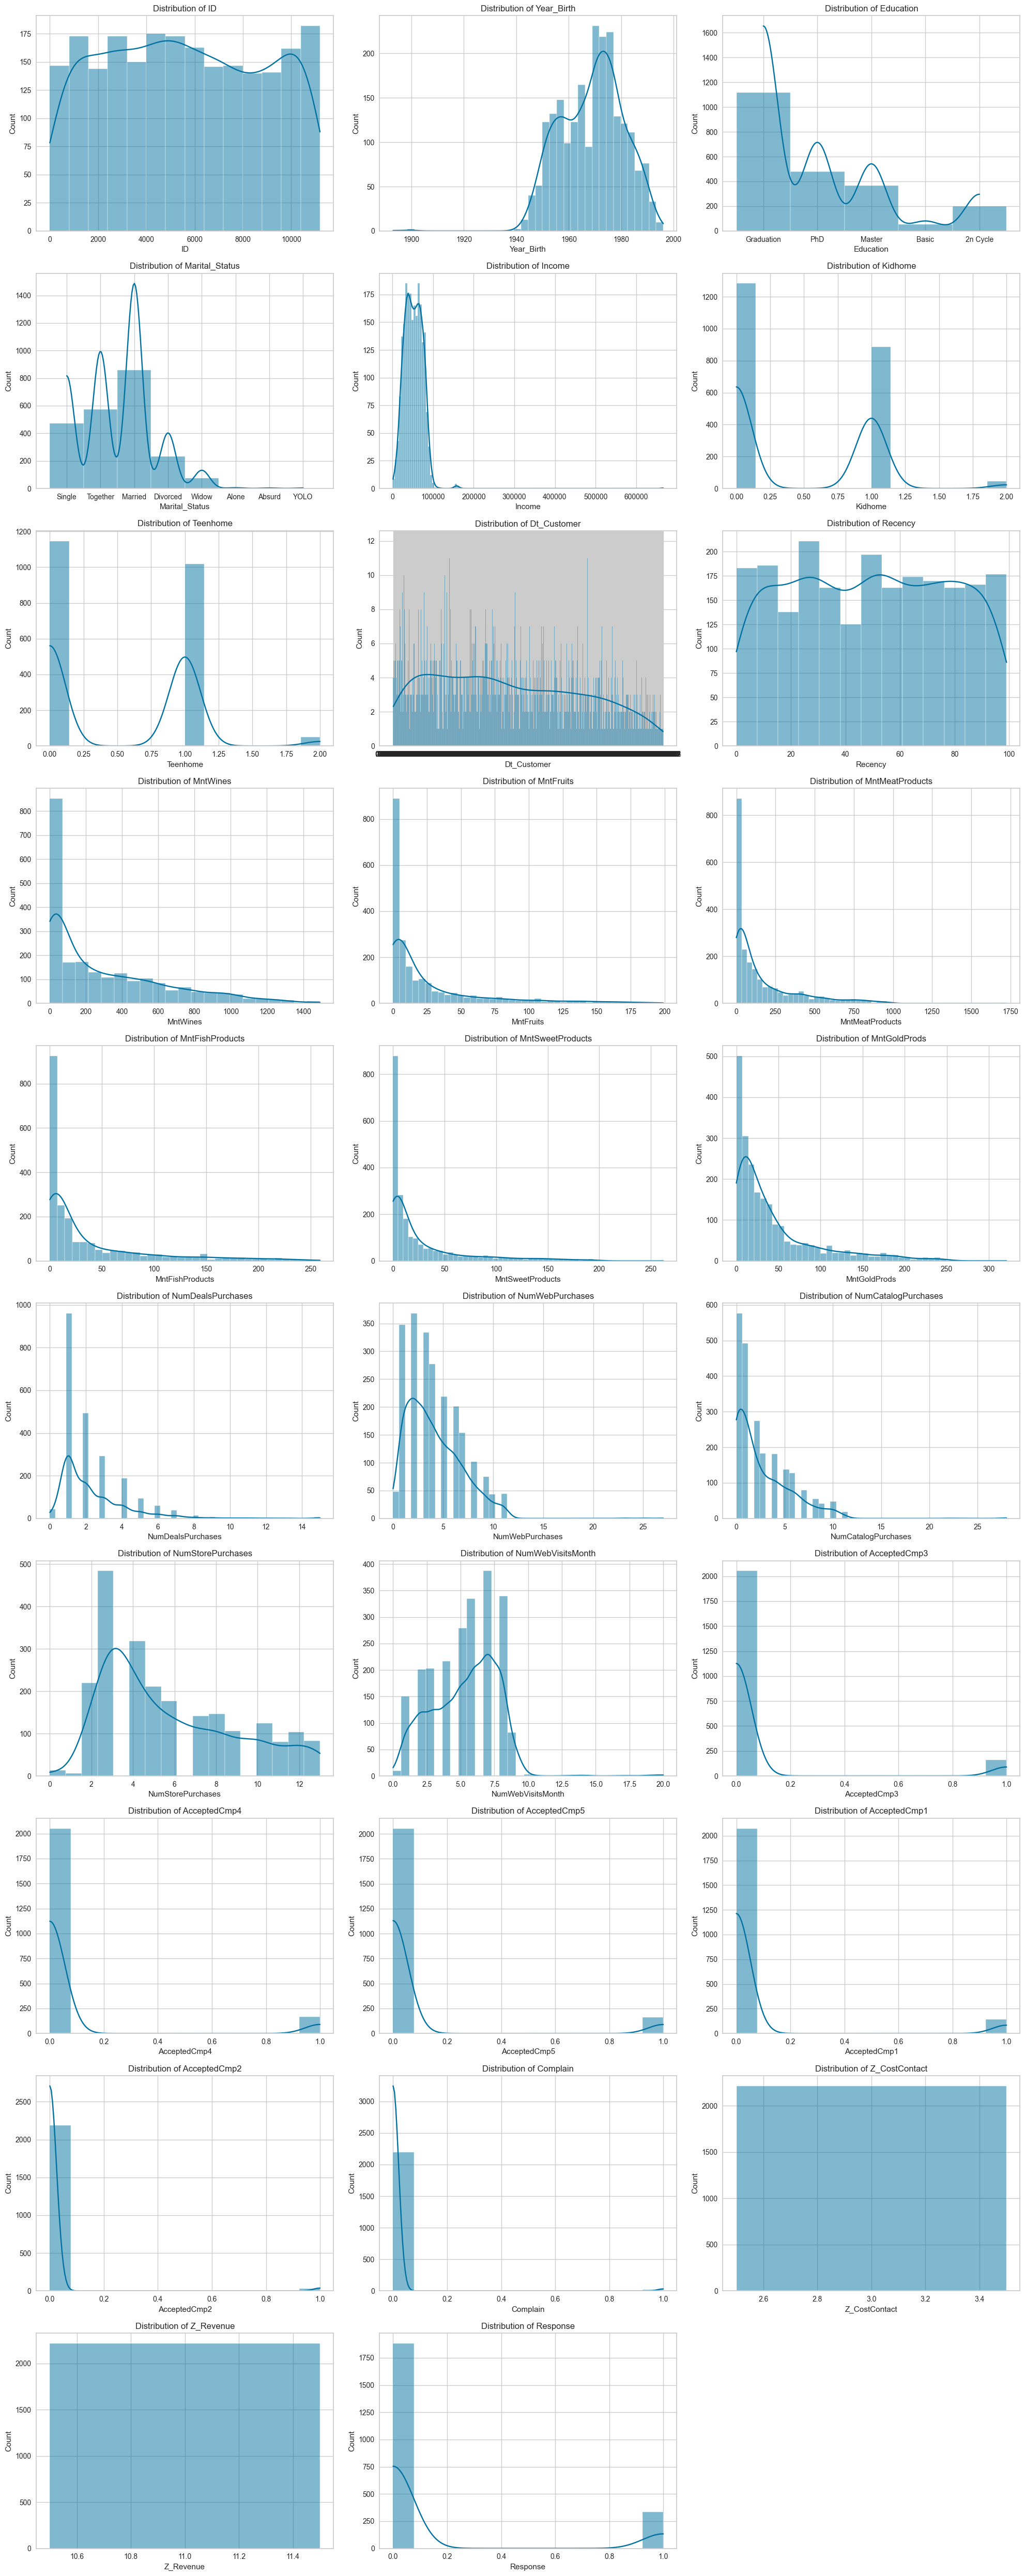

In [162]:
n_cols = 3  
n_rows = (len(df.columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  

for i, column in enumerate(df.columns):
    sea.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [163]:
df['Age'] = 2024-df['Year_Birth']
df['Age']

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2216, dtype: int64

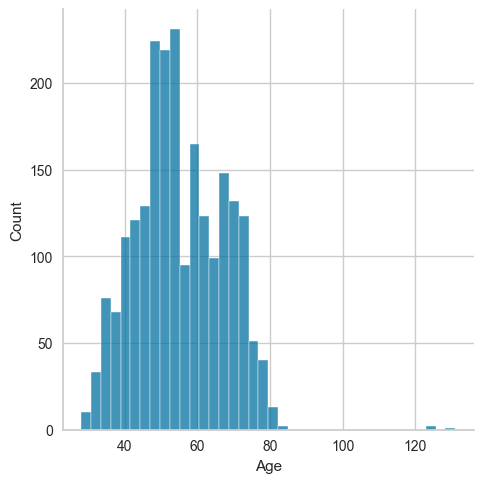

In [164]:
sea.displot(df['Age'])

([<matplotlib.patches.Wedge at 0x15d4d940770>,
 [Text(-0.01247550960836624, 1.0999292530249443, 'Graduation'),
  Text(-0.838064778939624, -0.7124938079035349, 'PhD'),
  Text(0.3597299567698606, -1.039516405932275, 'Master'),
  Text(0.9967921128661341, -0.4651940280440716, '2n Cycle'),
  Text(1.096778200038738, -0.08412835383974956, 'Basic')],
 [Text(-0.006804823422745221, 0.5999614107408786, '50.4%'),
  Text(-0.4571262430579767, -0.3886329861292008, '21.7%'),
  Text(0.19621634005628757, -0.5670089486903318, '16.5%'),
  Text(0.5437047888360731, -0.2537421971149481, '9.0%'),
  Text(0.5982426545665843, -0.04588819300349976, '2.4%')])

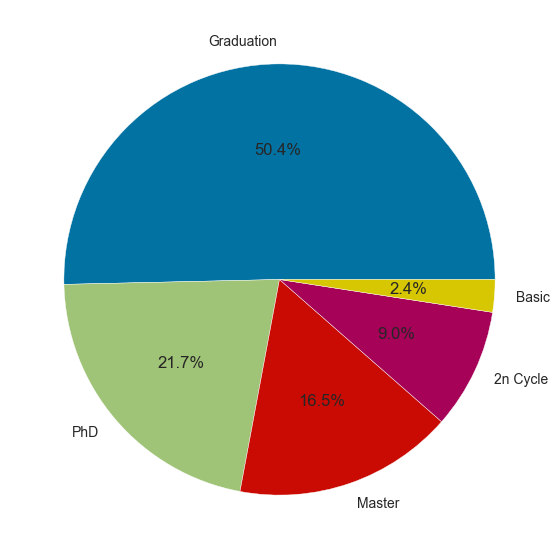

In [165]:
plt.figure(figsize=(7,7))
Education = df['Education'].value_counts()
plt.pie(Education, autopct='%1.1f%%', labels= [Education.index[0], Education.index[1] , Education.index[2], Education.index[3], Education.index[4]],)

C:\Users\benil\AppData\Local\Temp\ipykernel_10440\3508015425.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  MS.set_xticklabels(MS.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Marital Status')

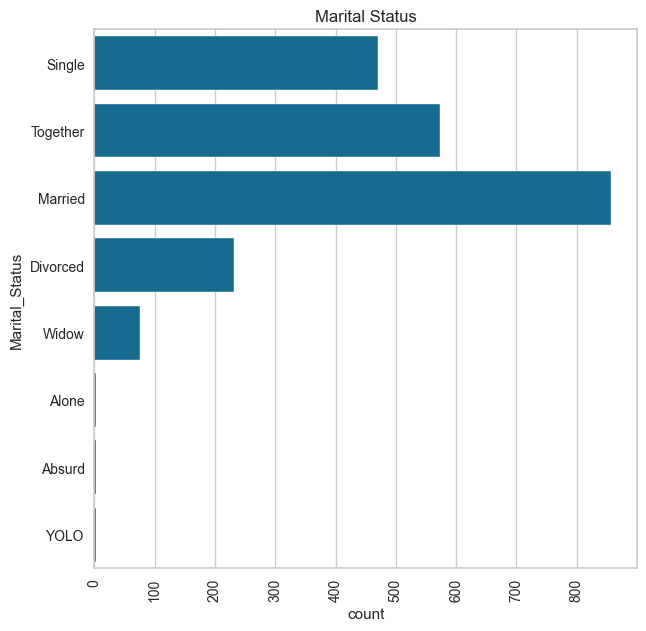

In [166]:
plt.figure(figsize=(7,7))
MS = sea.countplot(df['Marital_Status'])
MS.set_xticklabels(MS.get_xticklabels(), rotation=90)
plt.title('Marital Status')

<Figure size 700x700 with 0 Axes>

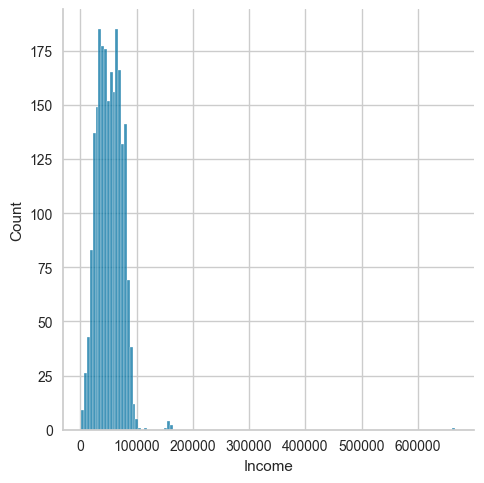

In [167]:
plt.figure(figsize=(7,7))
sea.displot(df['Income'])

<Figure size 700x700 with 0 Axes>

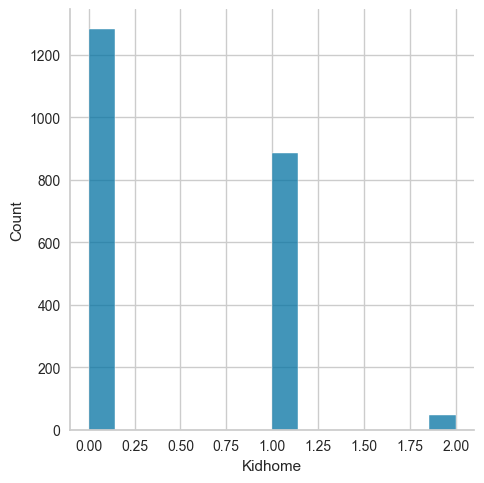

In [168]:
plt.figure(figsize=(7,7))
sea.displot(df['Kidhome'])

In [169]:
label_encoder = LabelEncoder()

df['Relationship'] = df['Marital_Status'].replace({'Married' : 2, 'Together' : 2 , 'Divorced' : 1 , 'Absurd' : 1 , 'Divorced' : 1, 'Widow' : 1, 'Single' : 1, 'YOLO' : 1, 'Alone' : 1 })
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Family_Size'] = df['Children'] + df['Relationship']

df['Education'] = label_encoder.fit_transform(df['Education'])

print (df['Family_Size'])
print(df['Education'])

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64
0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education, Length: 2216, dtype: int64


C:\Users\benil\AppData\Local\Temp\ipykernel_10440\2716925907.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Relationship'] = df['Marital_Status'].replace({'Married' : 2, 'Together' : 2 , 'Divorced' : 1 , 'Absurd' : 1 , 'Divorced' : 1, 'Widow' : 1, 'Single' : 1, 'YOLO' : 1, 'Alone' : 1 })


In [170]:
df.drop(['Year_Birth','AcceptedCmp2','AcceptedCmp1','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response', 'Dt_Customer', 'ID', 'Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)
df.drop(['Relationship', 'Marital_Status', 'Children'], axis=1, inplace=True)

In [171]:
z_scores = np.abs((df - df.mean()) / df.std())

# Define the threshold for Z-score
threshold = 3

# Filter the DataFrame to exclude outliers
df_filtered = df[(z_scores < threshold).all(axis=1)]

print(df_filtered)

      Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0             2  58138.0        0         0       58       635         88   
1             2  46344.0        1         1       38        11          1   
2             2  71613.0        0         0       26       426         49   
3             2  26646.0        1         0       26        11          4   
4             4  58293.0        1         0       94       173         43   
...         ...      ...      ...       ...      ...       ...        ...   
2234          2  34421.0        1         0       81         3          3   
2236          4  64014.0        2         1       56       406          0   
2237          2  56981.0        0         0       91       908         48   
2238          3  69245.0        0         1        8       428         30   
2239          4  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0

Removing the outliers based off of Z score.

<Axes: >

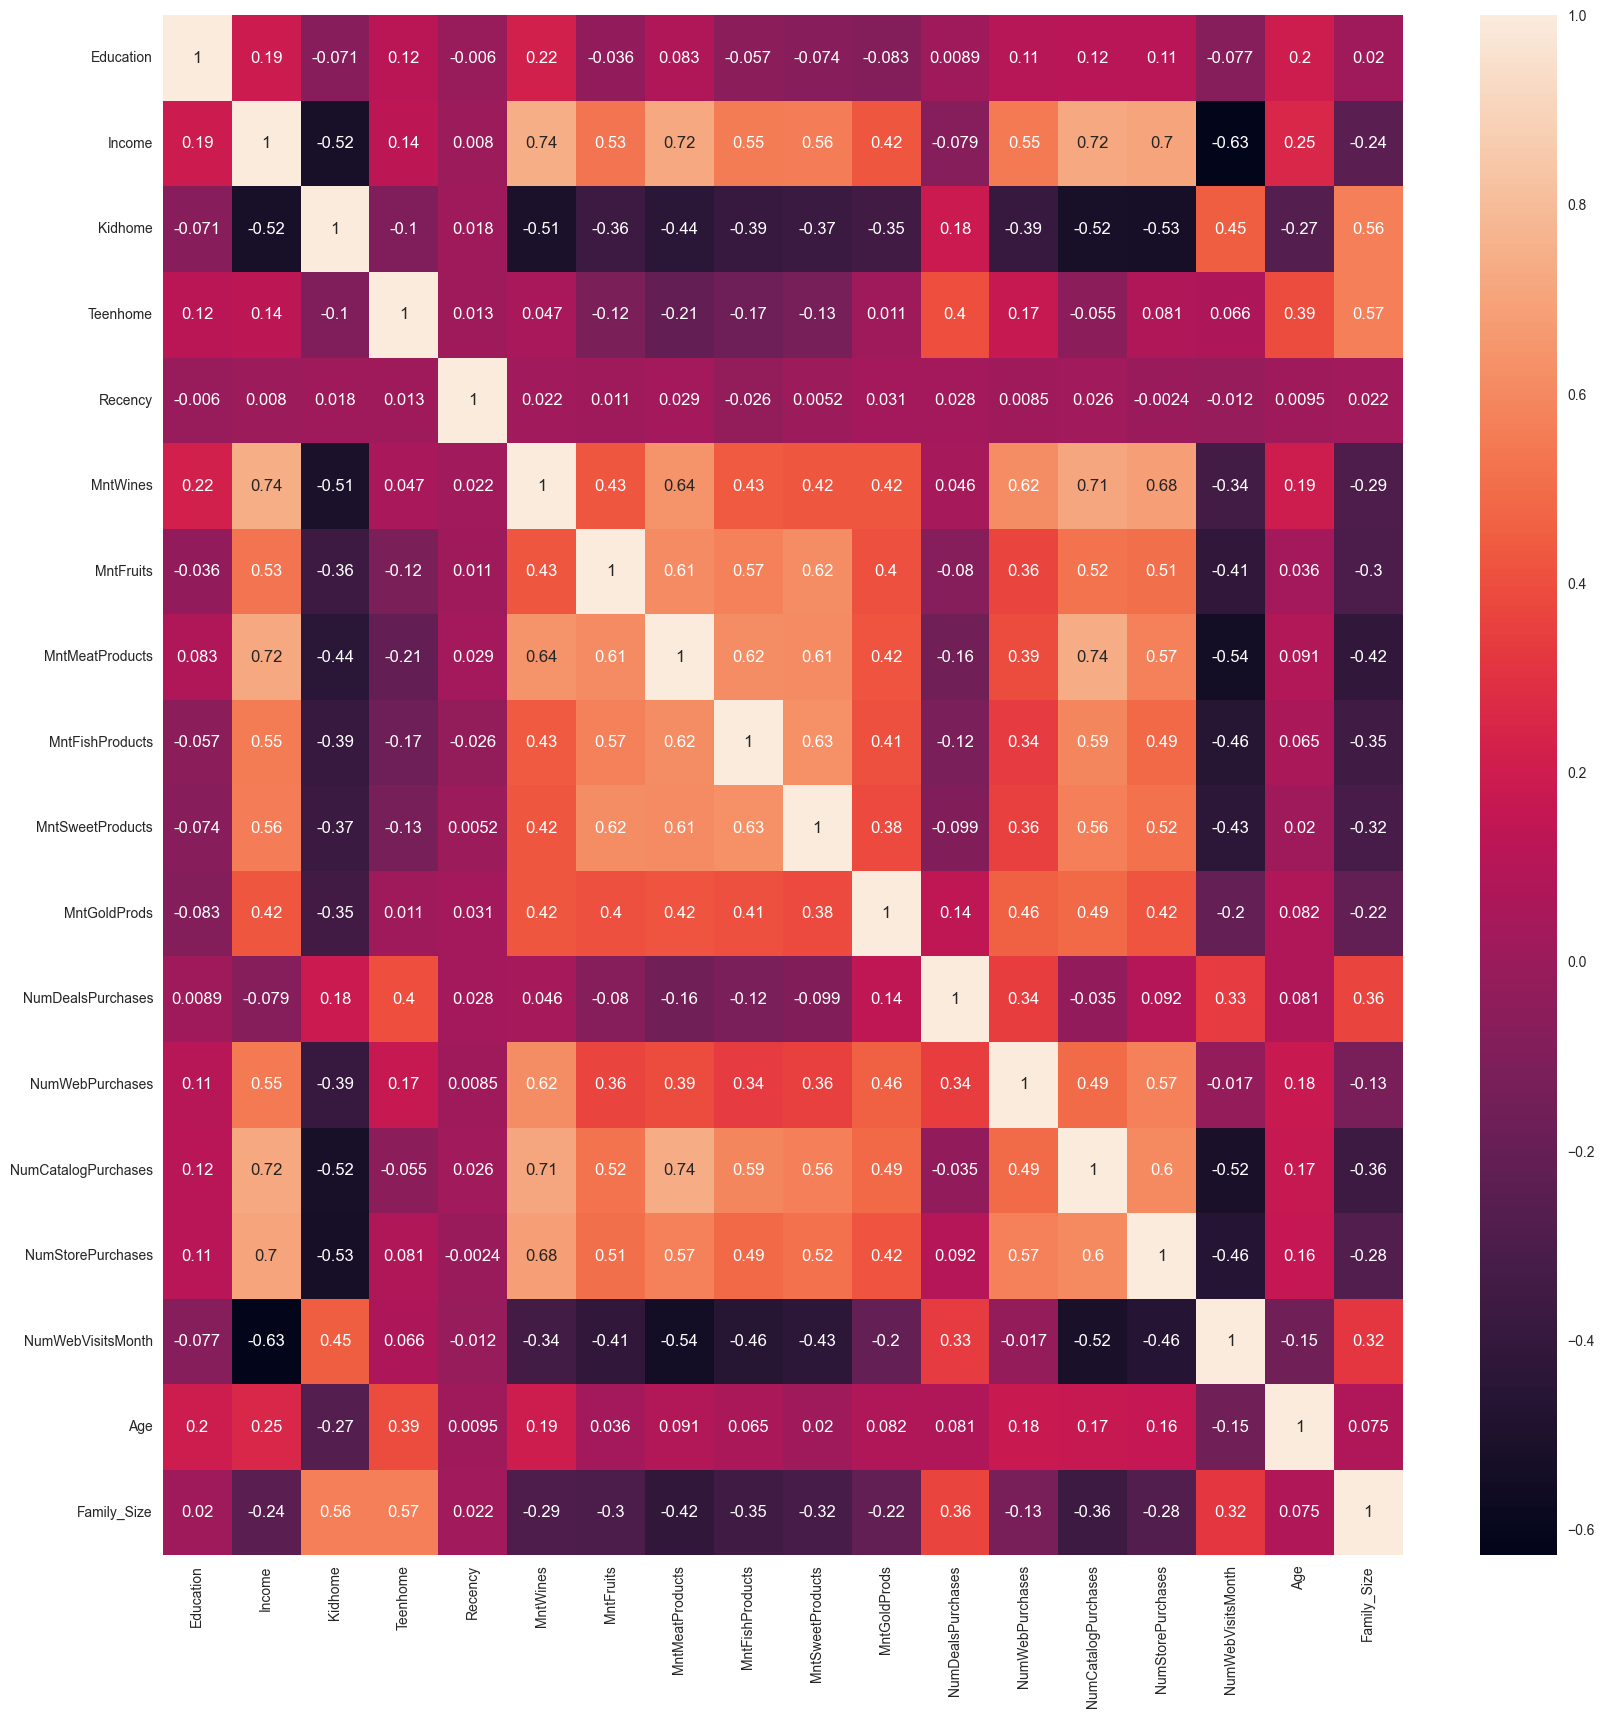

In [172]:
plt.figure(figsize=(20,20))
sea.heatmap(df_filtered.corr(), annot=True)

In [173]:
df_filtered['Total_spent'] = df_filtered['MntFishProducts'] + df_filtered['MntFruits'] + df_filtered['MntMeatProducts'] + df_filtered['MntGoldProds'] +df_filtered['MntSweetProducts'] + df_filtered['MntWines']

C:\Users\benil\AppData\Local\Temp\ipykernel_10440\3089175617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total_spent'] = df_filtered['MntFishProducts'] + df_filtered['MntFruits'] + df_filtered['MntMeatProducts'] + df_filtered['MntGoldProds'] +df_filtered['MntSweetProducts'] + df_filtered['MntWines']


In [174]:
df_filtered.isnull().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Age                    0
Family_Size            0
Total_spent            0
dtype: int64

In [175]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filtered.values)
scaled_df = pd.DataFrame(scaled_features, index=df_filtered.index, columns=df_filtered.columns)
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Family_Size,Total_spent
0,-0.370251,0.457372,-0.884448,-0.973141,0.305296,1.131228,2.310841,2.297869,3.409367,2.206827,1.189520,0.445144,1.562885,2.989602,-0.498942,0.681744,1.030933,-1.881044,2.051870
1,-0.370251,-0.145035,0.951182,0.870258,-0.385000,-0.816249,-0.633549,-0.697699,-0.634258,-0.631553,-0.727391,-0.186663,-1.114248,-0.503368,-1.128217,-0.229581,1.289085,0.384561,-0.895709
2,-0.370251,1.145639,-0.884448,-0.973141,-0.799177,0.478948,0.990942,-0.026470,1.958420,0.020948,0.114180,-0.818470,1.562885,-0.115260,1.388885,-0.685244,0.342528,-0.748241,0.492805
3,-0.370251,-1.151157,0.951182,-0.973141,-0.799177,-0.816249,-0.532018,-0.620036,-0.443969,-0.566303,-0.750768,-0.186663,-0.731801,-0.891475,-0.498942,0.226082,-1.292433,0.384561,-0.847510
4,1.402052,0.465289,0.951182,-0.973141,1.547829,-0.310654,0.787881,-0.076396,0.412328,0.216699,-0.516998,1.708758,0.415542,0.272848,0.130334,-0.229581,-1.034281,0.384561,-0.163449


Often models have a hard time with different ranges of values, therefore I standardized the data to be sure I have a good model

<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))>

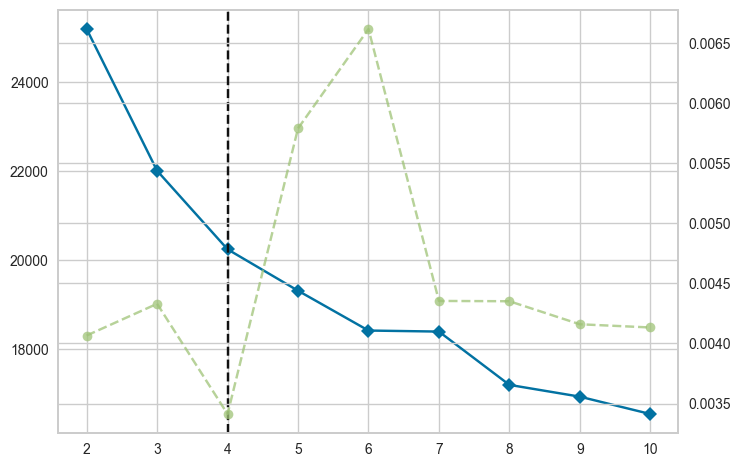

In [176]:
EM = KElbowVisualizer(KMeans(), k=10)
EM.fit(scaled_df)
EM.show

KELbowVisualizer is one of the best functions in python, it really cuts down on the time to run a cluster analysis. Instead of having Kmeans run a ton of iterations to figure out how many clusters it needs this command will find the right amount of clusters, unfortunately here there is no clear 'elbow'. 

In [177]:
df_new = pd.DataFrame(df_filtered).copy()

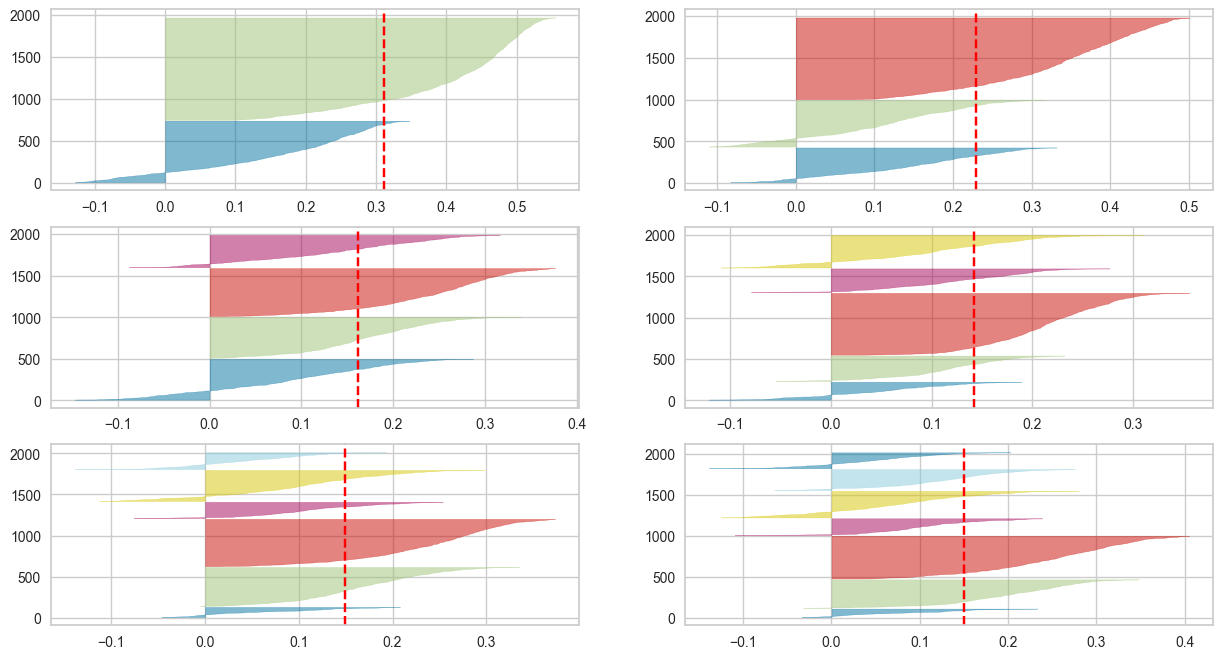

In [178]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    kmc = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmc, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df)

With this visualizer we are first looking that the score of each cluster to eclipse the the score of the overall dataset (the red line), the second thing we are looking for is similar widths between the clusters, this signifies close to equal amount of data points in each cluster. Therefore the best amount of clusters is k=4.

In [179]:
kmc = KMeans(n_clusters=4, init='k-means++', max_iter=100, random_state=42)
predictions = kmc.fit_predict(scaled_df)
df_new['Clusters'] = predictions

In [180]:
df_new['Clusters']

0       3
1       1
2       3
3       2
4       0
       ..
2234    2
2236    1
2237    3
2238    0
2239    1
Name: Clusters, Length: 1953, dtype: int32

<Axes: xlabel='Clusters', ylabel='count'>

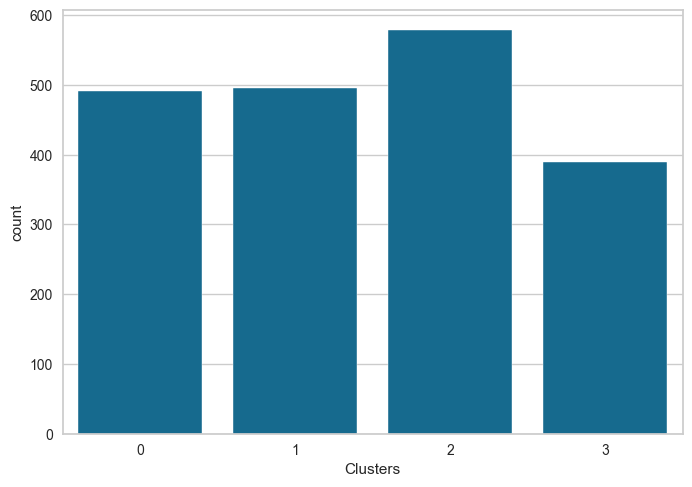

In [181]:
sea.countplot(x=df_new['Clusters'])

In [182]:
df_filtered.describe() 

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Family_Size,Total_spent
count,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000
mean,2.417819,49183.513057,0.481823,0.527906,49.154634,272.538146,19.719918,131.771633,28.665131,20.357911,37.115719,2.295443,3.913466,2.296979,5.585765,5.503840,55.019457,2.660522,510.168459
std,1.128764,19583.157030,0.544912,0.542615,28.980502,320.496676,29.555292,180.312488,42.052252,30.659142,42.788102,1.583167,2.615408,2.577264,3.179072,2.195168,11.624047,0.882992,539.563867
min,0.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,28.000000,1.000000,8.000000
25%,2.000000,33996.000000,0.000000,0.000000,24.000000,19.000000,1.000000,14.000000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,4.000000,47.000000,2.000000,62.000000
50%,2.000000,48006.000000,0.000000,1.000000,49.000000,135.000000,7.000000,52.000000,10.000000,7.000000,20.000000,2.000000,3.000000,1.000000,4.000000,6.000000,54.000000,3.000000,275.000000
75%,3.000000,64813.000000,1.000000,1.000000,74.000000,447.000000,24.000000,168.000000,36.000000,26.000000,47.000000,3.000000,6.000000,4.000000,8.000000,7.000000,64.000000,3.000000,895.000000
max,4.000000,101970.000000,2.000000,2.000000,99.000000,1315.000000,143.000000,838.000000,201.000000,150.000000,199.000000,8.000000,11.000000,11.000000,13.000000,10.000000,84.000000,5.000000,2440.000000


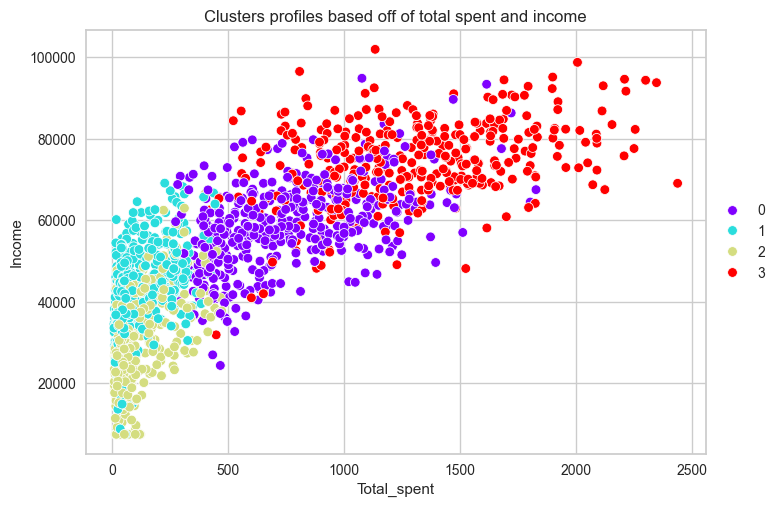

In [183]:
fig = sea.scatterplot(x=df_filtered['Total_spent'], y=df_filtered['Income'], hue=df_new['Clusters'], palette = 'rainbow' )
fig.set_title('Clusters profiles based off of total spent and income')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

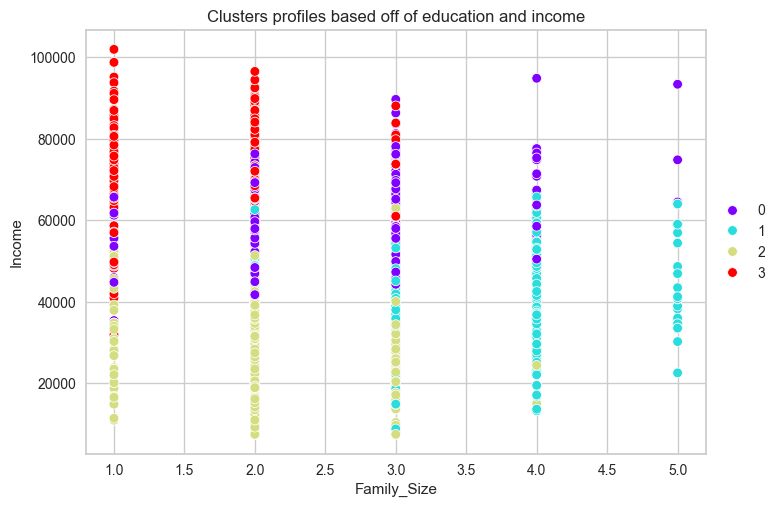

In [184]:
fig = sea.scatterplot(x=df_filtered['Family_Size'], y=df_filtered['Income'], hue=df_new['Clusters'], palette = 'rainbow' )
fig.set_title('Clusters profiles based off of education and income')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<Axes: xlabel='Clusters', ylabel='Age'>

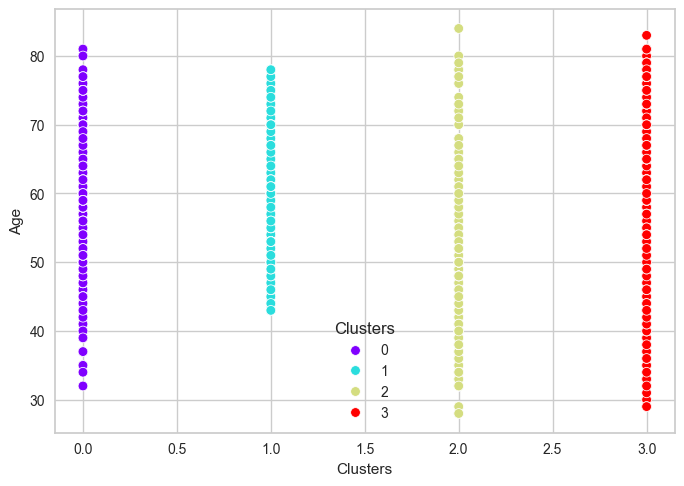

In [185]:
sea.scatterplot(x=df_new['Clusters'], y=df_filtered['Age'], hue= df_new['Clusters'], palette = 'rainbow' )

<Axes: xlabel='Education', ylabel='Income'>

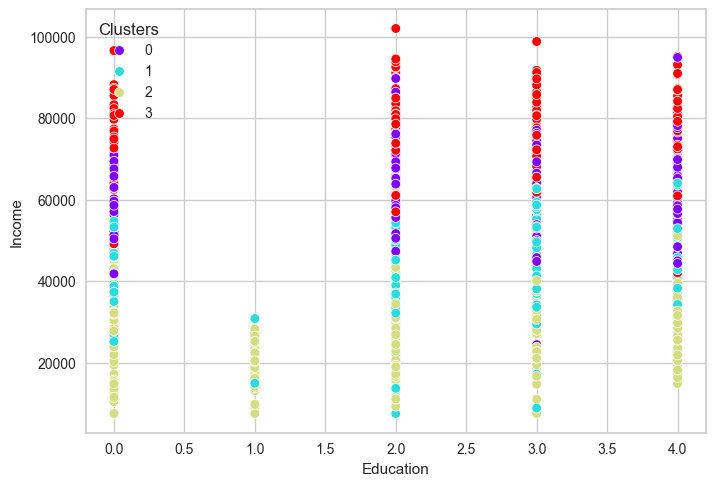

In [186]:
sea.scatterplot(x = df_filtered['Education'], y = df_filtered['Income'], hue= df_new['Clusters'], palette = 'rainbow' )

<Axes: xlabel='MntGoldProds', ylabel='Income'>

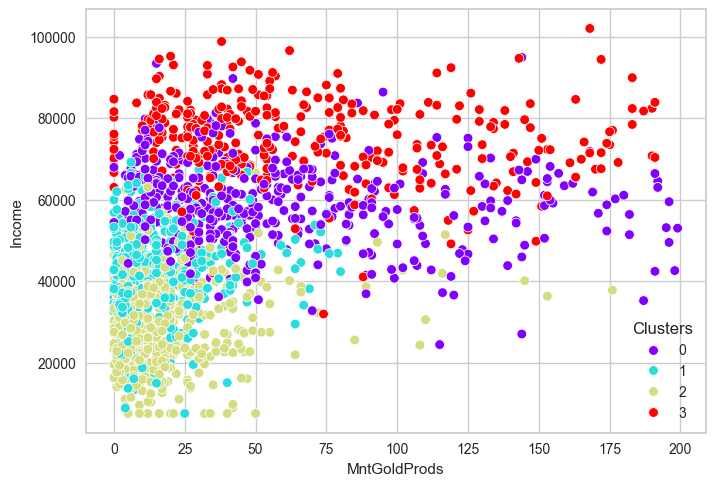

In [187]:
sea.scatterplot(x= df_filtered['MntGoldProds'], y = df_filtered['Income'], hue= df_new['Clusters'], palette = 'rainbow' )

<Axes: xlabel='NumWebPurchases', ylabel='Age'>

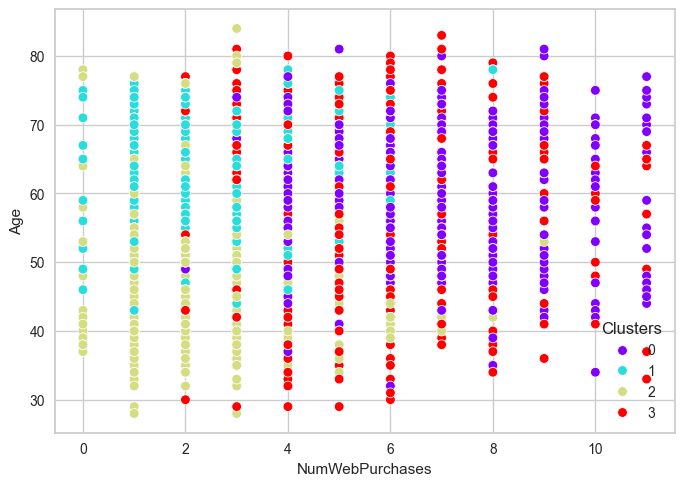

In [188]:
sea.scatterplot(x=df_filtered['NumWebPurchases'], y=df_filtered['Age'], hue= df_new['Clusters'], palette = 'rainbow' )

<Axes: xlabel='Clusters', ylabel='MntMeatProducts'>

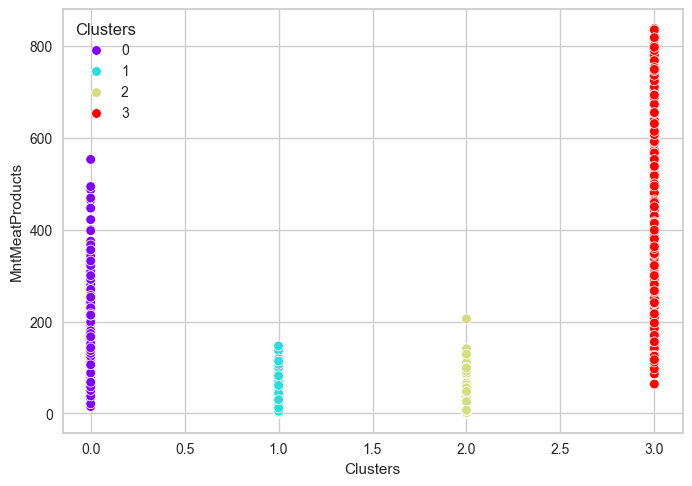

In [189]:
sea.scatterplot(x = df_new['Clusters'], y = df_filtered['MntMeatProducts'], hue= df_new['Clusters'], palette = 'rainbow' )

 This model turned out really well with four distinct clusters, this data can be used for many different things. A few examples of uses of this code is to run a targeted marketing campaign, to be more specific you could use geospatial data to find different levels of income and education in a county, from there you can choose a cluster to target. For example this data shows that typically people with higher income are more likely to purchase online, thus running a digital marketing campaign targeted at clusters 3 & 0 would be smart. To take this example furthur, typically people in these clusters are more likely to purchase gold products and healthier foods, therefore you can furthur tailor your campaign to be more efficent.
 
 Another good use for this model is determining how to set up a store, for example if you know your store is in a high income county and you know that higher income counties tend to purchase more meat products, maybe you want to set up the meat products in the back of the store, this will make consumers walk through the store and view other products, which may lead to increased sales.
 
Thanks for viewing :)